In [1]:
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

In [2]:
전data = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf_dm_5e8_0290.txt")

# 전 is the Hangul character for the surname Jeon of the data gatherer!
# it's just my linguistics side being quirky and I'm glad Jupyter Notebook supports Hangul characters like this!

In [3]:
dx = 전data[:,4]
# collect the 4th element of each row in the array into a massive array

dy = 전data[:,5]
# collect the 5th element of each row in the array into a massive array

dz = 전data[:,6]
# collect the 6th element of each row in the array into a massive array

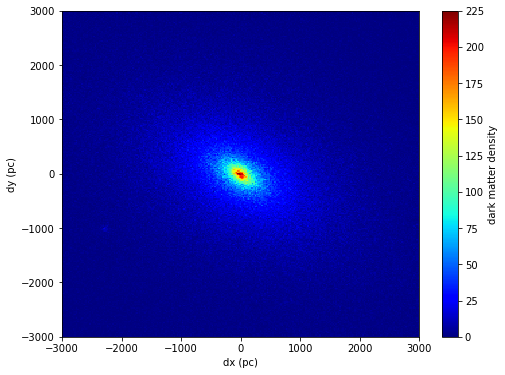

In [23]:
plt.figure(figsize=(8,6))

plt.hist2d(dx, dy, bins=(1000, 1000), cmap=plt.cm.jet) # this plots dx and dy
plt.colorbar(mappable=None, cax=None, ax=None, label='dark matter density')
plt.xlabel('dx (pc)')
plt.ylabel('dy (pc)')
plt.xlim(-3000,3000)
plt.ylim(-3000,3000)
plt.savefig("plot1_dxdy.png")

plt.show()

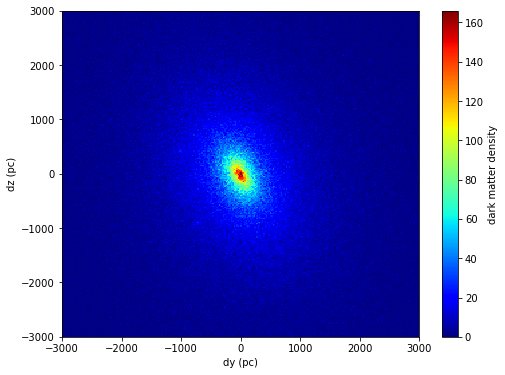

In [24]:
plt.figure(figsize=(8,6))

plt.hist2d(dy, dz, bins=(1000, 1000), cmap=plt.cm.jet) # this plots dy and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='dark matter density')
plt.xlabel('dy (pc)')
plt.ylabel('dz (pc)')
plt.xlim(-3000,3000)
plt.ylim(-3000,3000)
plt.savefig("plot2_dy_dz.png")

plt.show()

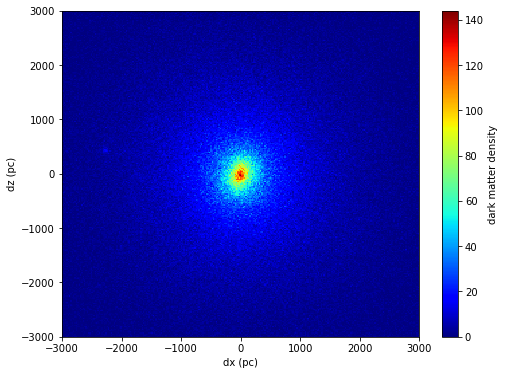

In [25]:
plt.figure(figsize=(8,6))

plt.hist2d(dx, dz, bins=(1000, 1000), cmap=plt.cm.jet) # this plots dx and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='dark matter density')
plt.xlabel('dx (pc)')
plt.ylabel('dz (pc)')
plt.xlim(-3000,3000)
plt.ylim(-3000,3000)
plt.savefig("plot3_dx_dz.png")

plt.show()